In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn")

In [4]:
stock2index = {
    "Microsoft": "MSFT",
    "Netflix": "NFLX",
    "Google": "GOOG",
    "BP": "BP",
    "Blackstone": "BX",
    "Tesla": "TSLA",
}

In [13]:
stock_list = [v for v in stock2index.values()]

df = yf.download(stock_list, "2021-04-01")

[*********************100%***********************]  6 of 6 completed


In [14]:
df.head(15)

Adj Close                                                  \
                   BP         BX         GOOG        MSFT        NFLX   
Date                                                                    
2021-03-31  22.994982  71.164383  2068.629883  233.865067  521.659973   
2021-04-01  23.212181  71.794586  2137.750000  240.391907  539.419983   
2021-04-05  22.909990  71.613167  2225.550049  247.057617  540.669983   
2021-04-06  23.703243  71.250320  2224.750000  245.857376  544.530029   
2021-04-07  23.958220  71.832779  2249.679932  247.880905  546.989990   
2021-04-08  23.344391  73.284134  2265.439941  251.203827  554.580017   
2021-04-09  23.032753  73.427361  2285.879883  253.782837  555.309998   
2021-04-12  23.249958  73.876144  2254.790039  253.842346  552.780029   
2021-04-13  23.249958  74.850082  2267.270020  256.401520  553.729980   
2021-04-14  24.118761  74.477684  2254.840088  253.524933  540.020020   
2021-04-15  23.797682  76.053177  2296.659912  257.403351  549.219971   
2021-04-16  23.778793  75.699883  2297.760010  258.633301  546.539978   
2021-04-19  23.901558  75.718994  2302.399902  256.649475  554.440002   
2021-04-20  23.401054  75.909950  2293.629883  256.173370  549.570007   
2021-04-21  23.571033  76.683365  2293.290039  258.474609  508.899994   

                            Close                                      ...  \
                  TSLA         BP         BX         GOOG        MSFT  ...   
Date                                                                   ...   
2021-03-31  667.929993  24.350000  74.529999  2068.629883  235.770004  ...   
2021-04-01  661.750000  24.580000  75.190002  2137.750000  242.350006  ...   
2021-04-05  691.049988  24.260000  75.000000  2225.550049  249.070007  ...   
2021-04-06  691.619995  25.100000  74.620003  2224.750000  247.860001  ...   
2021-04-07  670.969971  25.370001  75.230003  2249.679932  249.899994  ...   
2021-04-08  683.799988  24.719999  76.750000  2265.439941  253.250000  ...   
2021-04-09  677.020020  24.389999  76.900002  2285.879883  255.850006  ...   
2021-04-12  701.979980  24.620001  77.370003  2254.790039  255.910004  ...   
2021-04-13  762.320007  24.620001  78.389999  2267.270020  258.489990  ...   
2021-04-14  732.229980  25.540001  78.000000  2254.840088  255.589996  ...   
2021-04-15  738.849976  25.200001  79.650002  2296.659912  259.500000  ...   
2021-04-16  739.780029  25.180000  79.279999  2297.760010  260.739990  ...   
2021-04-19  714.630005  25.309999  79.300003  2302.399902  258.739990  ...   
2021-04-20  718.989990  24.780001  79.500000  2293.629883  258.260010  ...   
2021-04-21  744.119995  24.959999  80.309998  2293.290039  260.579987  ...   

                   Open                                        Volume  \
                   GOOG        MSFT        NFLX        TSLA        BP   
Date                                                                    
2021-03-31  2059.120117  232.910004  515.669983  646.619995  10283200   
2021-04-01  2097.949951  238.470001  529.929993  688.369995  14540500   
2021-04-05  2152.939941  242.759995  540.010010  707.710022  19634400   
2021-04-06  2222.500000  247.610001  544.809998  690.299988  24553400   
2021-04-07  2226.129883  247.809998  543.500000  687.000000  15516900   
2021-04-08  2277.959961  252.770004  551.130005  677.380005  19213800   
2021-04-09  2256.699951  252.869995  552.690002  677.770020  14609800   
2021-04-12  2266.250000  254.710007  551.049988  685.700012  20539600   
2021-04-13  2261.469971  257.260010  557.000000  712.700012  15819900   
2021-04-14  2275.159912  257.480011  554.869995  770.700012  22882400   
2021-04-15  2276.979980  257.929993  544.169983  743.099976  12977200   
2021-04-16  2303.000000  259.470001  550.539978  728.650024  10707500   
2021-04-19  2291.979980  260.190002  546.900024  719.599976  10967200   
2021-04-20  2307.889893  257.820007  554.419983  717.419983  19407600   
2021-04-21  2285.250000  258.940002  508.000000  70

In [15]:
returns = df["Adj Close"].pct_change()
returns = returns.dropna()

returns.head(15)

,BP,BX,GOOG,MSFT,NFLX,TSLA
Date,,,,,,
2021-04-01,0.009446,0.008856,0.033413,0.027909,0.034045,-0.009252
2021-04-05,-0.013019,-0.002527,0.041071,0.027729,0.002317,0.044277
2021-04-06,0.034625,-0.005067,-0.000359,-0.004858,0.007139,0.000825
2021-04-07,0.010757,0.008175,0.011206,0.008230,0.004518,-0.029857
2021-04-08,-0.025621,0.020205,0.007005,0.013405,0.013876,0.019122
2021-04-09,-0.013350,0.001954,0.009023,0.010267,0.001316,-0.009915
2021-04-12,0.009430,0.006112,-0.013601,0.000234,-0.004556,0.036867
2021-04-13,0.000000,0.013183,0.005535,0.010082,0.001718,0.085957
2021-04-14,0.037368,-0.004975,-0.005482,-0.011219,-0.024759,-0.039472


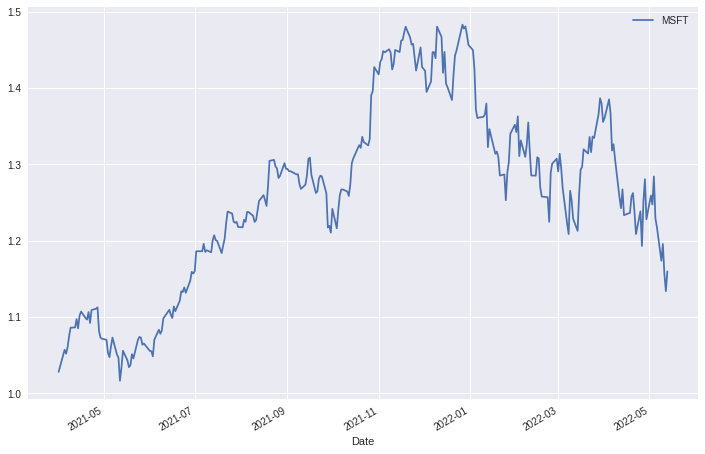

In [63]:
from copy import deepcopy

msft = deepcopy(returns[["MSFT"]])

msft.cumsum().apply(np.exp).plot(figsize=(12,8))
plt.show()

In [64]:
window = 3

In [65]:
msft.dropna(inplace=True)

msft = msft.rename(columns={"MSFT": "returns"})

In [66]:
msft.head(15)

,returns
Date,
2021-04-01,0.027909
2021-04-05,0.027729
2021-04-06,-0.004858
2021-04-07,0.008230
2021-04-08,0.013405
2021-04-09,0.010267
2021-04-12,0.000234
2021-04-13,0.010082
2021-04-14,-0.011219


In [67]:
msft["position"] = -np.sign(msft["returns"].rolling(window).mean())
msft.dropna(inplace=True)

In [72]:
msft["strategy"] = msft.position.shift(1) * msft["returns"]

msft.dropna(inplace=True)

msft.head(15)

,returns,position,strategy
Date,,,
2021-04-07,0.008230,-1.0,-0.008230
2021-04-08,0.013405,-1.0,-0.013405
2021-04-09,0.010267,-1.0,-0.010267
2021-04-12,0.000234,-1.0,-0.000234
2021-04-13,0.010082,-1.0,-0.010082
2021-04-14,-0.011219,1.0,0.011219
2021-04-15,0.015298,-1.0,0.015298
2021-04-16,0.004778,-1.0,-0.004778
2021-04-19,-0.007670,-1.0,0.007670


In [76]:
msft[["returns", "strategy"]].sum().apply(np.exp)

returns     1.102382
strategy    1.279277
dtype: float64

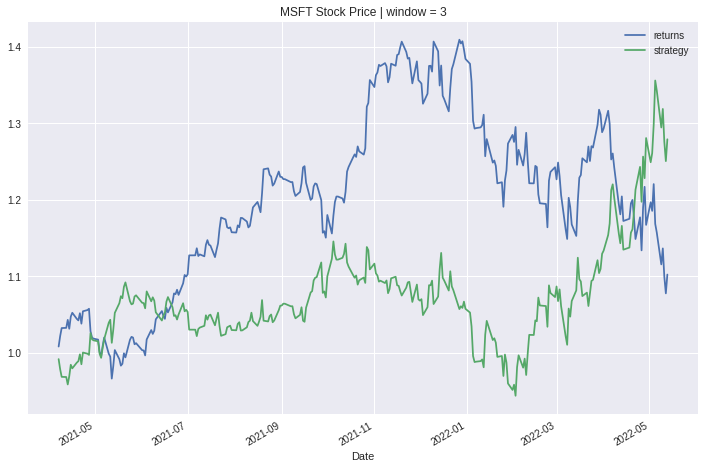

In [77]:
msft[["returns", "strategy"]].cumsum().apply(np.exp).plot(figsize=(12,8), title="MSFT Stock Price | window = 3")
plt.show()